In [9]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

In [10]:
df = pd.read_excel('pollution_no_gas_cleaned.xlsx', engine='openpyxl')

In [11]:

# summarize 'REGULATED INDUSTRY SECTOR'
summary = df['REGULATED INDUSTRY SECTOR'].describe()

print(summary)


count               2995
unique                13
top       water industry
freq                2286
Name: REGULATED INDUSTRY SECTOR, dtype: object


In [14]:
# Filter out the lines that contain "wastewater" or "controlled waters" in the ROUTE NAME
filtered_df = df[df['ROUTE NAME'].str.lower().str.contains('wastewater|controlled waters', na=False)]

# Collect statistics on the frequency of REGULATED INDUSTRY SECTOR and select the top seven
top_sectors = filtered_df['REGULATED INDUSTRY SECTOR'].value_counts().head(7)

# Print the first seven categories and their frequency
print("Top 7 REGULATED INDUSTRY SECTOR (filtered by ROUTE NAME):")
print(top_sectors)

# Extract the subsets corresponding to the first seven departments
top_sector_names = top_sectors.index.tolist()
top_sector_df = filtered_df[filtered_df['REGULATED INDUSTRY SECTOR'].isin(top_sector_names)]


Top 7 REGULATED INDUSTRY SECTOR (filtered by ROUTE NAME):
water industry        2286
chemicals              190
landfill                95
metals                  74
paper and textiles      74
refineries & fuel       72
efw                     51
Name: REGULATED INDUSTRY SECTOR, dtype: int64


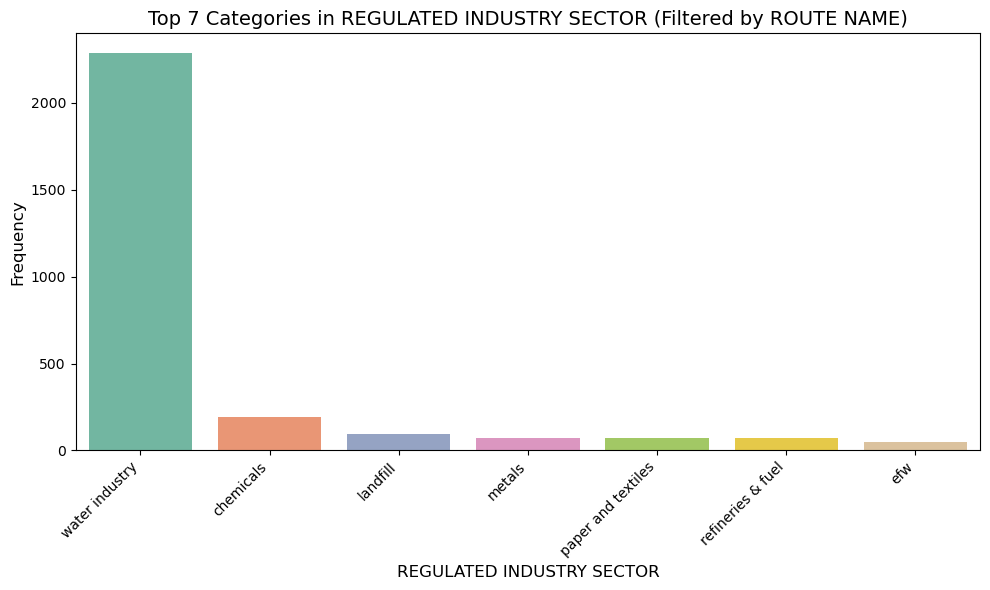

In [16]:
# Get the top seven most frequent REGULATED INDUSTRY sectors (filtered earlier)
top_sectors = filtered_df['REGULATED INDUSTRY SECTOR'].value_counts().head(7)

# Draw bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='Set2')

# Set the title and label
plt.title('Top 7 Categories in REGULATED INDUSTRY SECTOR (Filtered by ROUTE NAME)', fontsize=14)
plt.xlabel('REGULATED INDUSTRY SECTOR', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [22]:
# Filter out the lines that contain "wastewater" or "controlled waters" in the ROUTE NAME
filtered_df = df[df['ROUTE NAME'].str.lower().str.contains('wastewater|controlled waters', na=False)]

# Collect statistics on the frequency of REGULATED INDUSTRY SUB SECTOR and select the top 15
top_sub_sectors = filtered_df['REGULATED INDUSTRY SUB SECTOR'].value_counts().head(15)

# Print the first 15 categories and their frequency
print("Top 15 REGULATED INDUSTRY SUB SECTOR (filtered by ROUTE NAME):")
print(top_sub_sectors)

# Extract the subsets corresponding to the first 15 sub sectors
top_sub_sector_names = top_sub_sectors.index.tolist()
top_sub_sector_df = filtered_df[filtered_df['REGULATED INDUSTRY SUB SECTOR'].isin(top_sub_sector_names)]


Top 15 REGULATED INDUSTRY SUB SECTOR (filtered by ROUTE NAME):
Water Industry            2286
Chemicals                  190
Non Hazardous Landfill      79
Refineries & Fuel           72
EfW                         51
Food & Drink                50
Hazardous Waste             38
Textiles                    37
Paper & Pulp                34
Surface treatment           31
Ferrous                     26
Biowaste Treatment          25
Power                       20
Non-Ferrous                 16
Inert Landfill               9
Name: REGULATED INDUSTRY SUB SECTOR, dtype: int64


In [23]:
# summarize 'REGULATED INDUSTRY SUB SECTOR'
summary = df['REGULATED INDUSTRY SUB SECTOR'].describe()

print(summary)

count               2995
unique                22
top       Water Industry
freq                2286
Name: REGULATED INDUSTRY SUB SECTOR, dtype: object


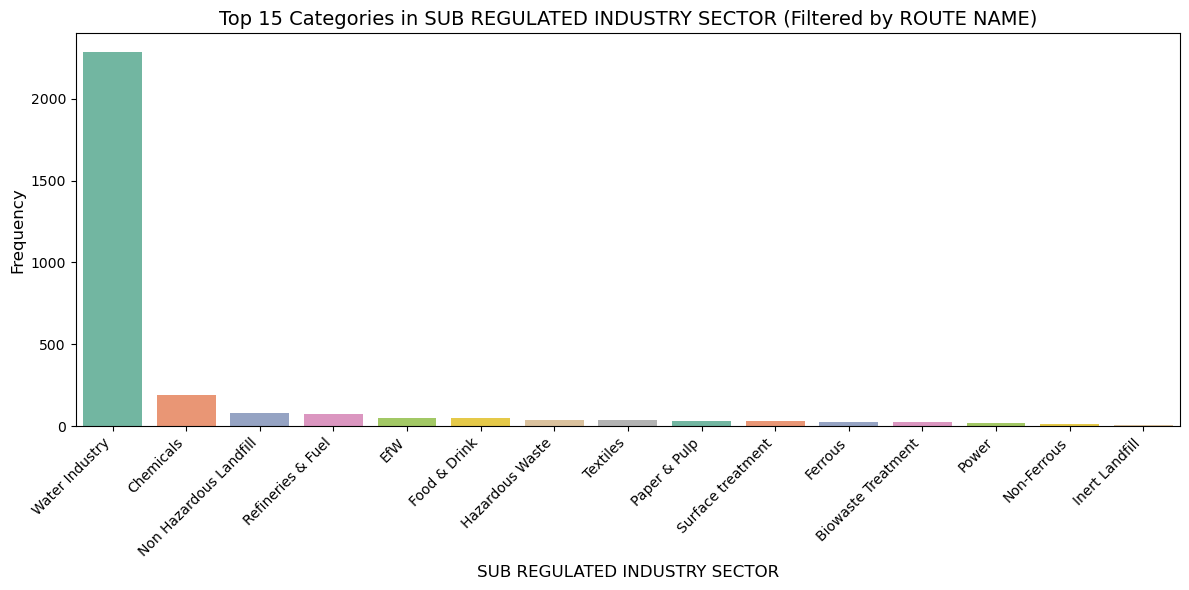

In [27]:
# Obtain the top 15 SUB REGULATED INDUSTRY sectors with the highest frequency
sub_value_counts = filtered_df['REGULATED INDUSTRY SUB SECTOR'].value_counts().head(15)

# Draw bar charts
plt.figure(figsize=(12, 6))
sns.barplot(x=sub_value_counts.index, y=sub_value_counts.values, palette='Set2')

# Set the title and label
plt.title('Top 15 Categories in SUB REGULATED INDUSTRY SECTOR (Filtered by ROUTE NAME)', fontsize=14)
plt.xlabel('SUB REGULATED INDUSTRY SECTOR', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the X-axis label to avoid overlapping
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [31]:

filtered_df = df[df['ROUTE NAME'].str.lower().str.contains('wastewater|controlled waters', na=False)]

# Obtain the first seven REGULATED INDUSTRY sectors
top_sectors = filtered_df['REGULATED INDUSTRY SECTOR'].value_counts().head(7).index

# Obtain the first 15 SUB REGULATED INDUSTRY sectors
top_subsectors = filtered_df['REGULATED INDUSTRY SUB SECTOR'].value_counts().head(15).index

# Further screening based on these two conditions
refined_df = filtered_df[
    (filtered_df['REGULATED INDUSTRY SECTOR'].isin(top_sectors)) &
    (filtered_df['REGULATED INDUSTRY SUB SECTOR'].isin(top_subsectors))
]

# Build contingency tables
contingency_table = pd.crosstab(
    refined_df['REGULATED INDUSTRY SECTOR'],
    refined_df['REGULATED INDUSTRY SUB SECTOR']
)

# print contigency table
print("Contingency Table (Top 7 Sectors × Top 15 Sub-sectors):")
print(contingency_table)


Contingency Table (Top 7 Sectors × Top 15 Sub-sectors):
REGULATED INDUSTRY SUB SECTOR  Chemicals  EfW  Ferrous  Inert Landfill  \
REGULATED INDUSTRY SECTOR                                                
chemicals                            190    0        0               0   
efw                                    0   51        0               0   
landfill                               0    0        0               9   
metals                                 0    0       26               0   
paper and textiles                     0    0        0               0   
refineries & fuel                      0    0        0               0   
water industry                         0    0        0               0   

REGULATED INDUSTRY SUB SECTOR  Non Hazardous Landfill  Non-Ferrous  \
REGULATED INDUSTRY SECTOR                                            
chemicals                                           0            0   
efw                                                 0            0 

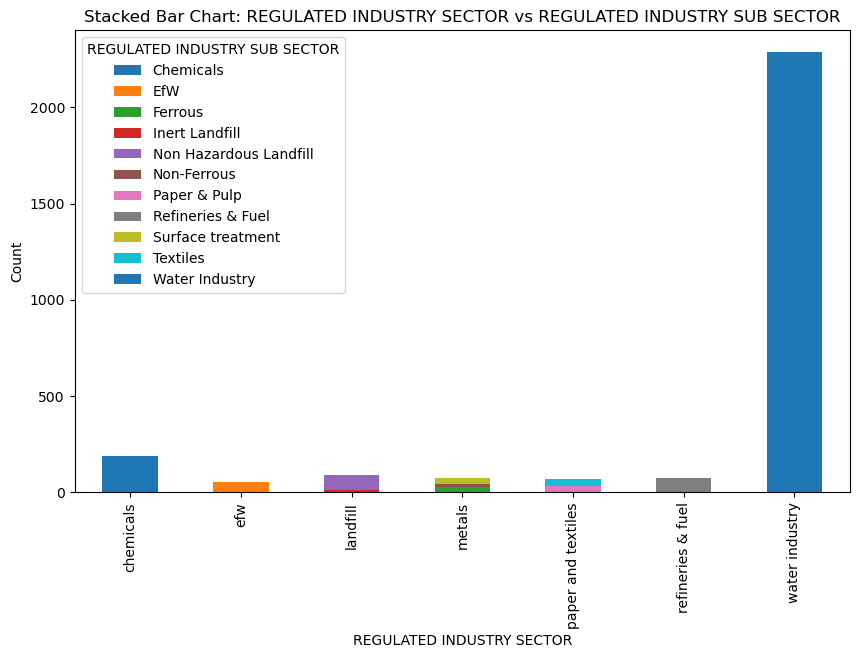

In [32]:
# stacked bar chart for REGULATED INDUSTRY SECTOR vs REGULATED INDUSTRY SUB SECTOR
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart: REGULATED INDUSTRY SECTOR vs REGULATED INDUSTRY SUB SECTOR')
plt.xlabel('REGULATED INDUSTRY SECTOR')
plt.ylabel('Count')

plt.show()